In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('../trainable_data/train_dumbbell_biceps_curls_trainable_data.csv')
df

left_arm   right_arm  left_elbow  right_elbow  left_waist_leg   
0    157.365592  164.024860  157.895969    87.132035       13.344870  \
1    156.770033  164.672516  171.409359    93.599739       13.500455   
2    156.653147  164.928525  174.058985   100.477872       13.580439   
3    157.522800  165.226591  170.988771   106.975211       13.800840   
4    158.753476  165.307705  173.154928   113.305482       13.953446   
..          ...         ...         ...          ...             ...   
602  157.746881  167.054731    1.085945    14.725777       11.885580   
603  157.604977  167.022495    1.374481    15.038570       11.907836   
604  157.489862  166.983549    1.566526    15.350962       11.940504   
605  157.361558  166.815844    1.789407    15.468969       11.964588   
606  157.274281  166.675119    1.928005    15.449928       12.065090   

     right_waist_leg  left_knee  right_knee  leftup_chest_inside   
0          10.310495   1.276373    2.378964            99.571646  \
1           9.997150   1.095975    2.636419            99.603391   
2           9.948527   1.013269    2.737561            99.604155   
3           9.595532   0.931652    2.827916            99.630184   
4           9.516587   0.925997    2.815620            99.592190   
..               ...        ...         ...                  ...   
602         7.257203   2.378644    5.466745            96.183982   
603         7.246848   2.411253    5.507240            96.245000   
604         7.237215   2.420289    5.538142            96.298107   
605         7.276647   2.421476    5.528657            96.369809   
606         7.250783   2.411283    5.598477            96.509547   

     rightup_chest_inside  leftlow_chest_inside  rightlow_chest_inside   
0               96.250214             84.672656              87.493839  \
1               96.171992             84.523914              87.753865   
2               96.233774             84.427934              87.881029   
3               96.188088             84.266021              88.155880   
4               96.330956             84.170055              88.283059   
..                    ...                   ...                    ...   
602             97.659116             84.385261              90.315054   
603             97.648323             84.371976              90.366664   
604             97.634739             84.367480              90.387646   
605             97.625905             84.341576              90.412904   
606             97.572161             84.328100              90.437736   

     leg_spread  Label  Sequence  
0    146.268632  Entry         0  
1    146.259498  Entry         0  
2    146.302904  Entry         0  
3    146.346461  Entry         0  
4    146.377628  Entry         0  
..          ...    ...       ...  
602  147.650509   Exit         5  
603  147.688677   Exit         5  
604  147.722275   Exit         5  
605  147.755866   Exit         5  
606  147.801048   Exit         5  

[607 rows x 15 columns]

In [5]:
df[['Sequence','Label']].value_counts()

Sequence  Label
5         Exit     99
0         Exit     93
4         Exit     62
3         Exit     61
1         Exit     59
2         Exit     58
3         Entry    47
0         Entry    46
1         Entry    41
2         Entry    41
Name: count, dtype: int64

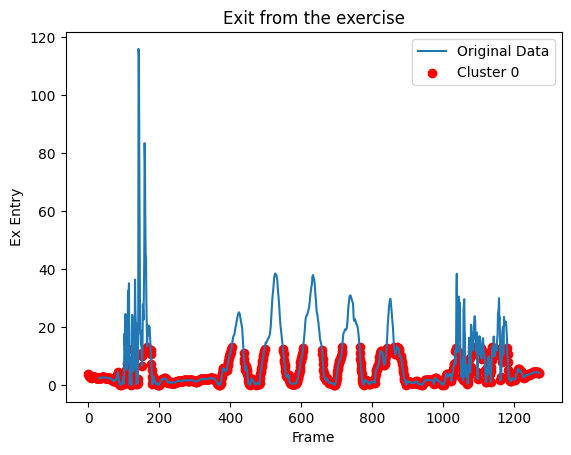

In [25]:
# Set the sequence length
seq_length = 30

# Extract selected frames based on cluster_to_extract
cluster_to_extract = 0
selected_frames = df[df['left_knee_cluster'] == cluster_to_extract]['Frame']
selected_angles = df[df['left_knee_cluster'] == cluster_to_extract]['left_knee']

# Visualize the selected data points
plt.plot(df['Frame'][seq_length:], df['left_knee'][seq_length:], label='Original Data')
plt.scatter(selected_frames, selected_angles, color='red', label=f'Cluster {cluster_to_extract}')
plt.title(f'Exit from the exercise')
plt.xlabel('Frame')
plt.ylabel('Ex Entry')
plt.legend()
plt.show()

In [14]:
# Set the sequence length
seq_length = 30

# Desired cluster to extract
cluster_to_extract = 1

# Filter the data based on the cluster label
cluster_data = df[df['left_knee_cluster'] == cluster_to_extract]

# Extract corresponding frames
entry_frames = cluster_data['Frame'][seq_length:].tolist()

print(entry_frames)

[161, 162, 163, 164, 165, 167, 168, 169, 170, 171, 172, 173, 174, 175, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 842, 843,

In [15]:
def separate_non_continuous_numbers(numbers):
    clusters = []
    current_cluster = []

    for num in sorted(numbers):
        if not current_cluster or num == current_cluster[-1] + 1:
            current_cluster.append(num)
        else:
            clusters.append(current_cluster)
            current_cluster = [num]

    if current_cluster:
        clusters.append(current_cluster)

    return clusters

nonc = separate_non_continuous_numbers(entry_frames)

In [18]:
valid = []
for li in nonc:
    if len(li)>seq_length:
        print(len(li))
        valid.append(li)
        
print(valid)

33
51
52
48
[[405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437], [498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548], [607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658], [717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764]]
